
# pyEDITH Tutorial: Imaging Mode

This tutorial will guide you through using pyEDITH in imaging mode. We'll explore how to set up parameters, run the Exposure Time Calculator (ETC), and analyze the results.

## 1. Basic Usage

This section will explain how to use the premade ``umbrella'' functions in the code.

### 1.1 Setup and Imports

First, let's import the necessary modules and set up our environment:


In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from pyEDITH import parse_input, calculate_texp, calculate_snr, AstrophysicalScene, Observation, ObservatoryBuilder
from pyEDITH.units import *

# Set the necessary environment variables
# Replace with your paths or add to your .bashrc/.zshrc:
# export SCI_ENG_DIR="/path/to/Sci-Eng-Interface/hwo_sci_eng"
# export YIP_CORO_DIR="/path/to/yips"



### 1.2 Defining Input Parameters

Let's set up the parameters for an Earth-like planet around a Sun-like star.


**Note:** Parameters that vary with lambda (wavelength, resolution, snr, fluxes, contrasts...) can be both floats and lists. If len(wavelength)>1 and any of the other values is a float, it becomes a list of length len(wavelength) internally.

In [49]:
imaging_params = {
    'wavelength': 0.5,              # Wavelength in microns
    'snr': 7,                       # Desired signal-to-noise ratio
    'bandwidth': 0.2,               # Bandwidth of observation
    'CRb_multiplier': 2.0,          # Count rate ratio multiplier (assuming differential imaging for PSF subtraction)
    'psf_trunc_ratio': 0.3,         # PSF Truncation Ratio to calculate photometric aperture of solid angle Omega. 
    'distance': 10,                 # Distance to star in parsecs
    'FstarV_10pc': 122.9279,        # Stellar flux at 10 pc in the V band [ph/cm2/s/nm]
    'Fstar_10pc': 115.59984,        # Stellar flux at 10 pc in the observed band [ph/cm2/s/nm]
    'Fp/Fs': 1e-10,                 # Planet-to-star contrast
    'stellar_radius': 1,            # Stellar radius in solar radii
    'nzodis': 3.0,                  # Number of zodiacal light disks
    'ra': 236.00757736823,          # Right ascension of star [deg]
    'dec': 2.51516683165,           # Declination of star [deg]
    'separation': 0.1,              # Separation between star and planet in arcseconds
    'observatory_preset': 'EAC1',   # Preset observatory configuration
    'observing_mode': 'IMAGER',     # Observing mode
}


### 1.3 Running the ETC

We can now package the parameters so that they will be ingested by the ETC. 

In [50]:
# Make the parameters be the shape that the code desires 
parsed_parameters= parse_input.parse_parameters(imaging_params)

Then, we can calculate the exposure time:

In [51]:

# Calculate Exposure time
texp, validation_output = calculate_texp(parsed_parameters, verbose=False)
print(f"Calculated exposure time: {texp.to(u.hr)}")

Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:06,760] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:06,763] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:06,763] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:06,823] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:06,889] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Calculated exposure time: [3.85955507] h


We can also calculate the SNR for a given exposure time (e.g. 3 hours):


In [52]:

# Calculate SNR given a specific exposure time
texp = 3*u.hr
snr, validation_output = calculate_snr(parsed_parameters, texp, verbose=False)
print(f"Calculated snr: {snr}")

Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:12,052] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:12,053] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:12,053] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:12,086] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:12,106] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Calculated snr: [4.70499861]


`validation_output` contains some interesting quantities that you can use to double check or validate, or to plot additional quantities.

In [53]:
validation_output

{0: {'F0': <Quantity 12638.83670769 ph / (nm s cm2)>,
  'magstar': <Quantity [5.09687467] mag>,
  'dist': <Quantity 10. pc>,
  'D': <Quantity 7.225765 m>,
  'A_cm': <Quantity 410069.58591604 cm2>,
  'wavelength': <Quantity 500. nm>,
  'deltalambda_nm': <Quantity 100. nm>,
  'snr': <Quantity 4.70499861>,
  'nzodis': <Quantity 3. zodi>,
  'toverhead_fixed': <Quantity 8250. s>,
  'toverhead_multi': <Quantity 1.1>,
  'det_DC': <Quantity 3.e-05 electron / (pix s)>,
  'det_RN': <Quantity 0.1 electron / (pix read)>,
  'det_CIC': <Quantity 0. electron / (frame pix)>,
  'det_tread': <Quantity 1000. s / read>,
  'det_pixscale_mas': <Quantity 7.13643491 mas>,
  'dQE': <Quantity 0.75>,
  'QE': <Quantity 0.88749741 electron / ph>,
  'T_optical': <Quantity 0.36198356>,
  'Fs_over_F0': <Quantity 115.59984 ph / (nm s cm2)>,
  'Fp': <Quantity 1.1559984e-08 ph / (nm s cm2)>,
  'Fzodi': <Quantity 7.72303075e-06 ph / (nm s arcsec2 cm2)>,
  'Fexozodi': <Quantity 4.69979038e-05 arcsec^-2 ph / (nm s arcsec2 



The code can also perform **simultaneous observations**. This is the key feature used in [Alei et al. 2025](DUMMY LINK). For example, we assume the primary (detection) bandpass to be 0.5 micron with 20% bandwidth. What is the SNR of a secondary bandpass at 1 micron with 20% bandpass?


In [54]:
# Let's note down the values that change compared to imaging_params
secondary_imaging_params = {
    'wavelength': 1,  # Wavelength in microns
    'Fstar_10pc': 100,  # Stellar flux in observation band
    }

# Fill the missing values
for key in imaging_params:
        if key not in secondary_imaging_params:
            secondary_imaging_params[key] = imaging_params[key]

print("Calculating texp from primary lambda")
parsed_parameters= parse_input.parse_parameters(imaging_params)

texp, _ = calculate_texp(parsed_parameters, verbose=False)
print("Reference exposure time: ", texp.to(u.hr))
if np.isfinite(texp).all():
    print("Calculating snr on secondary lambda")
    parsed_secondary_parameters= parse_input.parse_parameters(secondary_imaging_params)

    snr, _ = calculate_snr(parsed_secondary_parameters, texp, verbose=False)
    print("SNR at the secondary lambda: ", snr)
else:
    raise ValueError("Returned exposure time is infinity.")

Calculating texp from primary lambda
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:16,944] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:16,946] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:16,947] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:16,985] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:17,001] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Reference exposure time:  [3.85955507] h
Calculating snr on secondary lambda
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:21,638] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:21,639] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:21,639] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:21,672] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:21,690] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
SNR at the secondary lambda:  [3.87416375]


## 2. Advanced Usage

In the preceding examples, we utilized the premade `calculate_texp` and `calculate_snr` functions. While this approach is straightforward, it can lead to significant performance overhead in scenarios involving repeated calculations with large parameter spaces or numerous iterations. This is because each function call reinitializes the entire calculation process.

For improved computational efficiency, particularly when dealing with extensive parameter sweeps, it is advisable to implement the loop logic within the `calculate_texp` function itself. This approach allows for targeted iteration over specific parameters while maintaining the state of other computationally intensive components.

To illustrate this optimization technique, we can examine the internal structure of the `calculate_texp` function. Refer to the `pyEDITH` workflow picture for details.

In [55]:
from pyEDITH import calculate_exposure_time_or_snr, parse_input
params = imaging_params.copy()

# Parse the desired parameters
parsed_parameters= parse_input.parse_parameters(params)

# Define Observation and load relevant parameters
observation = Observation()
observation.load_configuration(parsed_parameters)
observation.set_output_arrays()
observation.validate_configuration()

# Define Astrophysical Scene and load relevant parameters,
# then calculate zodi/exozodi
scene = AstrophysicalScene()
scene.load_configuration(parsed_parameters)
scene.calculate_zodi_exozodi(parsed_parameters)
scene.validate_configuration()

# Create and configure Observatory using ObservatoryBuilder
observatory_config = parse_input.get_observatory_config(parsed_parameters)
observatory = ObservatoryBuilder.create_observatory(observatory_config)
ObservatoryBuilder.configure_observatory(
    observatory, parsed_parameters, observation, scene
)
observatory.validate_configuration()

# EXPOSURE TIME CALCULATION
calculate_exposure_time_or_snr(
    observation,
    scene,
    observatory,
    verbose=False,
    mode="exposure_time",
)

Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:26,777] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:26,778] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:26,779] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:26,811] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:26,831] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...


.. danger::
When the observatory architecture or the astrophysical scene change (e.g., varying the telescope diameter, the separation of the planet..) you should reload the observatory initialization, since coronagraph response and noise terms will change.

## 3. Parameter Space Exploration

Now, let's explore how various parameters affect the exposure time and SNR.


### 3.1 Planet-to-star contrast
Let's explore how the exposure time changes with planet-to-star contrast:



Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:31,818] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:31,819] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:31,820] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:31,853] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:31,871] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:36,974] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:36,976] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:36,976] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:37,014] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:37,031] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:41,739] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:41,740] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:41,741] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:41,772] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:41,789] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:46,647] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:46,648] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:46,648] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:46,681] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:46,698] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:51,580] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:51,582] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:51,582] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:51,615] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:51,632] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:05:56,957] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:05:56,959] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:05:56,959] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:05:56,996] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:05:57,013] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:02,084] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:02,085] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:02,086] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:02,117] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:02,133] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:07,042] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:07,044] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:07,044] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:07,081] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:07,099] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:11,902] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:11,903] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:11,904] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:11,941] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:11,958] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:16,697] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:16,698] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:16,698] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:16,732] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:16,748] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...


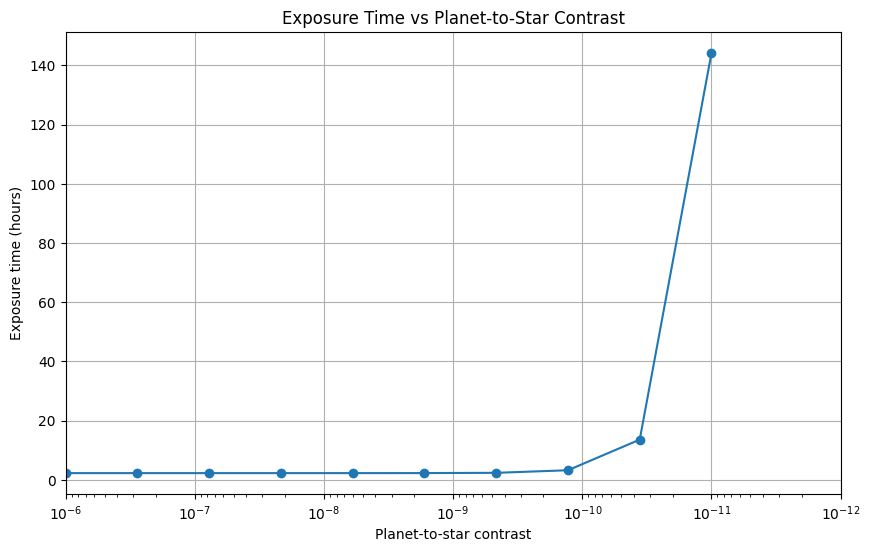

In [56]:
contrasts = np.logspace(-6, -11, 10)
exposure_times = []


for contrast in contrasts:
    params = imaging_params.copy()
    params['Fp/Fs'] = contrast
    # make the parameters be the shape that the code desires 
    parsed_parameters= parse_input.parse_parameters(params)

    texp, validation_output = calculate_texp(parsed_parameters, verbose=False)


    exposure_times.append(texp.to(u.hr).value)
plt.figure(figsize=(10, 6))
plt.semilogx(contrasts, exposure_times, marker='o')
plt.xlabel('Planet-to-star contrast')
plt.ylabel('Exposure time (hours)')
plt.title('Exposure Time vs Planet-to-Star Contrast')
plt.grid(True)
plt.xlim(1e-6,1e-12)
plt.show()


### 5.2 Telescope Diameter

Let's explore the impact of telescope diameter on exposure time:


Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:21,740] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:21,741] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:21,741] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:21,781] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:21,798] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:26,851] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:26,853] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:26,853] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:26,884] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:26,901] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:31,644] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:31,645] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:31,646] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:31,677] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:31,693] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:36,618] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:36,619] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:36,620] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:36,660] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:36,676] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:41,482] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:41,484] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:41,484] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:41,515] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:41,532] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:46,386] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:46,388] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:46,389] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:46,427] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:46,446] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...


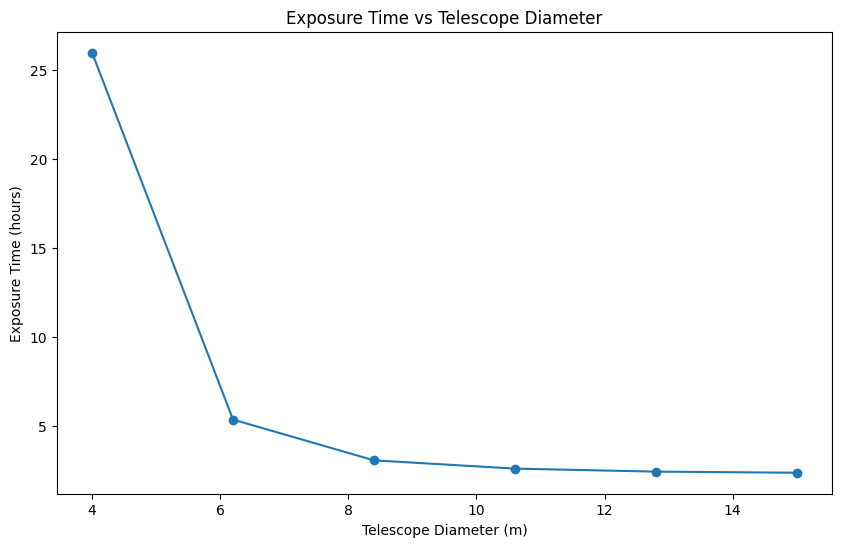

In [57]:
diameters = np.linspace(4, 15, 6)  

exposure_times = []

for diam in diameters:
    params = imaging_params.copy()
    params['diameter'] = diam # will overwrite the standard EAC1 telescope diameter
    parsed_parameters= parse_input.parse_parameters(params)
    texp, _ = calculate_texp(parsed_parameters, verbose=False)
    exposure_times.append(texp.to(u.hr)[0].value)


# MAKE PLOT
plt.figure(figsize=(10, 6))
plt.plot(diameters, exposure_times, marker='o')

plt.xlabel('Telescope Diameter (m)')
plt.ylabel('Exposure Time (hours)')
plt.title('Exposure Time vs Telescope Diameter')
plt.show()


### 3.2 Separation

Now let's change the separation of the planet and see how the exposure time changes.

Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:51,302] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:51,304] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:51,304] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:51,340] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:51,357] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:06:56,686] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:06:56,688] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:06:56,688] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:06:56,727] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:06:56,746] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:01,555] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:01,557] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:01,557] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:01,598] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:01,618] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:06,545] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:06,546] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:06,547] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:06,611] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:06,639] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:11,756] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:11,758] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:11,758] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:11,832] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:11,905] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:17,052] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:17,053] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:17,054] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:17,099] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:17,116] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:22,159] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:22,160] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:22,161] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:22,201] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:22,218] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:27,338] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:27,340] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:27,340] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:27,397] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:27,414] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:32,987] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:32,989] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:32,990] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:33,060] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:33,092] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:38,654] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:38,656] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:38,657] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:38,740] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:38,805] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...


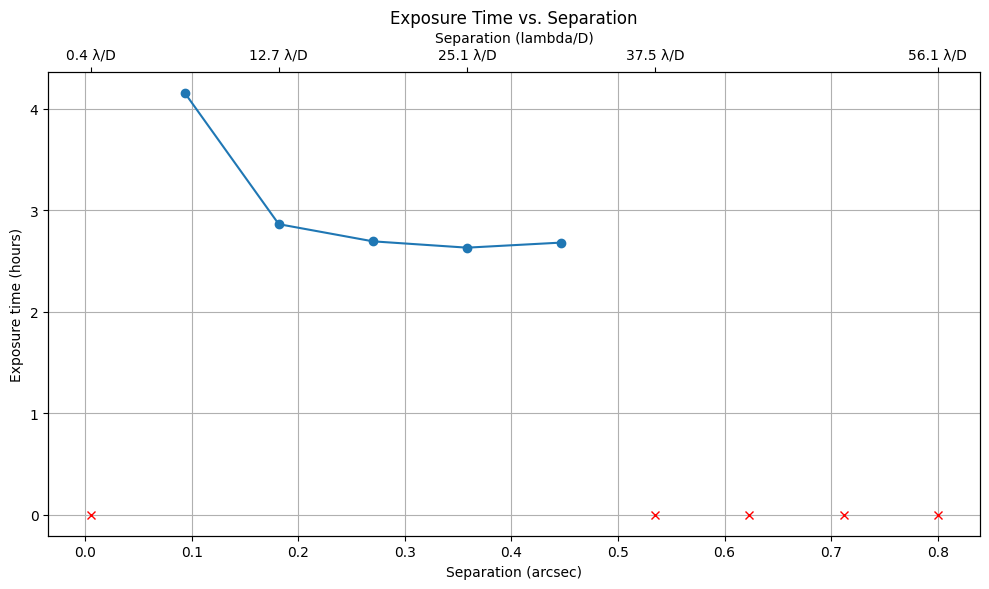

In [58]:
separations = np.linspace(0.005, 0.8, 10)  # arcsec 

exposure_times = []

for sep in separations:
    params = imaging_params.copy()
    params['separation'] = sep
    parsed_parameters= parse_input.parse_parameters(params)

    texp, _ = calculate_texp(parsed_parameters, verbose=False)
    exposure_times.append(texp.to(u.hr)[0].value)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary x-axis (separation arcsec)
ax1.plot(separations, exposure_times, marker='o', label='Valid exposures')
ax1.plot(separations[np.isinf(exposure_times)],
         np.ones_like(separations)[np.isinf(exposure_times)]*0,
         marker='x', linestyle='', color='red', label='Infinite exposures')


ax1.set_xlabel('Separation (arcsec)')
ax1.set_ylabel('Exposure time (hours)')
ax1.grid(True)

separations_lod = arcsec_to_lambda_d(separations*ARCSEC,
observation.wavelength[0].to(LENGTH),
observatory.telescope.diameter.to(LENGTH),
)
# # Secondary x-axis (lambda/D)
num_ticks = 5 
tick_indices = np.linspace(0, len(separations) - 1, num_ticks, dtype=int)
reduced_separations = [separations[i] for i in tick_indices]
reduced_separations_lod = [separations_lod[i] for i in tick_indices]
ax2 = ax1.twiny()
ax2.set_xticks(reduced_separations)
ax2.set_xticklabels([f'{m:.1f}' for m in reduced_separations_lod])
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Separation (lambda/D)')

plt.title('Exposure Time vs. Separation')
plt.tight_layout()





What if you have a planet and you want to vary the physical distance instead of calculating the corresponding separation? You can also use the keyword ``semimajor_axis'' and pyEDITH will calculate the separation internally.

Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:44,144] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:44,145] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:44,146] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:44,179] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:44,197] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:49,001] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:49,002] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:49,003] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:49,036] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:49,054] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:53,929] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:53,930] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:53,931] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:53,963] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:53,980] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:07:58,789] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:07:58,790] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:07:58,790] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:07:58,822] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:07:58,839] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:03,894] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:03,896] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:03,896] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:03,927] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:03,946] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:09,050] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:09,051] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:09,051] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:09,086] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:09,104] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:14,023] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:14,024] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:14,024] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:14,055] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:14,072] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:19,015] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:19,016] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:19,017] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:19,052] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:19,069] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:24,595] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:24,597] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:24,597] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:24,632] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:24,650] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...
Observatory Configuration:
  Using preset: EAC1



[yippy] INFO [2025-09-02 18:08:29,939] Creating usort_offaxis_ovc coronagraph
[yippy] WARNING [2025-09-02 18:08:29,940] Unhandled header fields: {'D_INSC'}
[yippy] WARNING [2025-09-02 18:08:29,941] Using default unit for D: m. Could not extract unit from comment: "circumscribed diameter of the telescope in mete"
[yippy] INFO [2025-09-02 18:08:29,972] usort_offaxis_ovc is radially symmetric
[yippy] INFO [2025-09-02 18:08:29,990] Created usort_offaxis_ovc


Using psf_trunc_ratio to calculate Omega...
Azimuthally averaging contrast maps and noise floor...
Calculating optics throughput from preset...
Calculating epswarmTrcold as 1 - optics throughput...


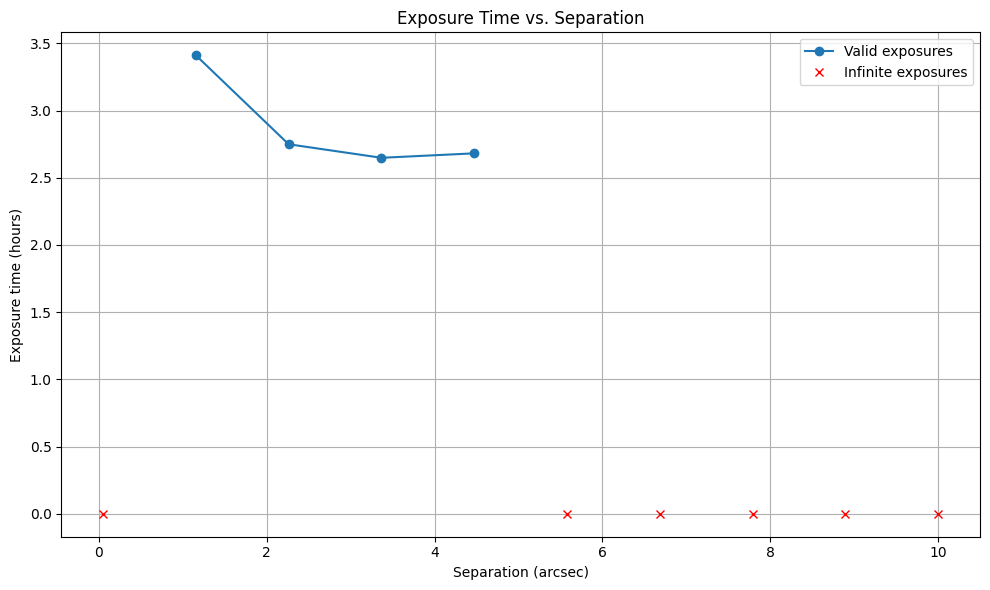

In [59]:
semimajor_axes = np.linspace(0.05, 10, 10)  # AU 

exposure_times = []

for a in semimajor_axes:
    params = imaging_params.copy()
    del params['separation']
    params['semimajor_axis'] = a 
    parsed_parameters= parse_input.parse_parameters(params)

    texp, _ = calculate_texp(parsed_parameters, verbose=False)
    exposure_times.append(texp.to(u.hr)[0].value)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary x-axis (separation arcsec)
ax1.plot(semimajor_axes, exposure_times, marker='o', label='Valid exposures')
ax1.plot(semimajor_axes[np.isinf(exposure_times)],
         np.ones_like(semimajor_axes)[np.isinf(exposure_times)]*0,
         marker='x', linestyle='', color='red', label='Infinite exposures')


ax1.set_xlabel('Separation (arcsec)')
ax1.set_ylabel('Exposure time (hours)')
ax1.grid(True)

plt.title('Exposure Time vs. Separation')
plt.legend()
plt.tight_layout()

